<a id='top'></a>

# CSCI 3022: Intro to Data Science - Fall 2019 Practicum 1
***

This practicum is due on Canvas by **11:59 PM on Friday October 11**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**:  Muntaha Pasha

***


**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |[Bottom](#bot)

---

In [1]:
from scipy import stats
from random import randint
import random
from scipy.special import binom
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

<br>

---
[Back to top](#top)
<a id='p1'></a>

### [30 points] Problem 1: Rubber Ducky Race

Every year, the Aspen Valley Rotary Club hosts a [rubber ducky race](https://www.aspenrotary.org/page/the-ducky-derby). Each Rubber Ducky is stamped with a number, tickets are sold  and if your ducky makes it to the end of the course first, you win. Exact Rules follow:

1. The Rotary Club sells "Duck Adoption" papers. Only Ducks that have been adopted start the race, so there must always be a winner.
2. The ducks are dumped into a river and race to a finish line. The adoptive parent of the first duck across the line wins. The standard prize is 15,000 dollars.
3. Before the start of the duck race, the Rotary Club randomly draws a number of special ducks. For every 3,333 ducks that start the race, 1 special duck is drawn.
4. If a special duck wins the race the prize is increased from 15,000 dollars to 1,000,000 dollars.

**Assume that all ducks are equally likely to win the ducky race.**

**Part A:**
Given that 9999 ducks start the race and you purchase 1 duck, calculate the probability by hand that your duck is selected as a special ducky.

**PART A (Solution):**

Assume $P(SD)$ is the probability that you get a special ducky.

First, we will find the number of special duckies. There are 9999 ducks, and 1 special is chosen for every 3333.

$\frac{9999}{3333} = 3$, so we know that there will be exactly $\textbf{3}$ special duckies.

Now we know that your chances of having the special ducky is...

$$P(SD) = \frac{3}{9999} = \frac{1}{3333} \checkmark$$


**Part B:** Calculate the probability that the rotary club pays out the million dollar prize.

**PART B (Solution):**

Assume $P(RM)$ is the probability that the rotary pays out the million dollar prize.

Well, we know that only 3 out of 9999 ducks have the shot as being chosen as the special ducks, meaning that the chance the rotary has to pay out a million dollars as a prize will ALSO be the same probability we found in Part A. 

$$P(RM) = \frac{3}{9999} = \frac{1}{3333} \checkmark$$

**Part C:** Calculate the probability that your duck is both picked as a special duck and wins the race.

**PART C (Solution):**

Assume $P(SD)$ is the probability of having a special ducky, and $P(DW)$ is the probability that the ducky wins the race.

We want to know $P(\text{SD and DW})$. 

When we deal with "and", we usually mean $\underline{\text{multiplication}}$, and refers to the $\underline{\text{union}}$ of two events.

That means we can write the probability as the following. $P(SD \cap DW) = P(SD) * P(DW)$.

The probability of having a special duck is $P(SD) = \frac{1}{3333}$ as we found in Part A.

The probability of winning the race is just $P(DW) = \frac{1}{9999}$. All ducks are equally likely to win.

Multiply those two probabilities, and you get the following...

$$P(SD \cap DW) = \frac{1}{3333} * \frac{1}{9999} = \frac{1}{33326667} \checkmark$$

**Part D:** Calculate the expected payout for the Rotary Club for a 9999 duck race. 

**PART D (Solution):**

Well we know that only $\frac{3}{9999}$ ducks can win the million dollars, and $\frac{9996}{9999}$ can win the 15k.

So we can calculate it like so.

Expected Payout = $(\frac{3}{9999})(1,000,000) + (\frac{9996}{9999})(15,000)$.

$$\text{Expected Payout} \approx \$ 15,295.53 \checkmark$$


**Part E:** The Rotary Club takes out an insurance policy on having to pay the 1,000,000 dollar prize. They pay $50 per duck race to the insurance company. From your answer above, is this worth it? Explain. Is there any number of ducks that make the insurance policy a good deal? If it is not worth it, what's a reason the the Rotary Club might buy the policy anyways? 

**PART E (Solution):**

(IMPORTANT!: On Piazza, it said it was 500 dollars per race, so I am using that assumption in my answer!)
The insurance deal is that the Rotary Club pay 500 per race to the insurance. The probability of the rotary club paying out the 1,000,000 dollars is $\approx 0.0003$ in any given race. Let's say they do take this insurance deal. To pay an equivalent number of dollars to the insurance as the million dollar prize, it would take them 2,000 races (500 * 2000 is 1,000,000). So the question is, what are the odds of having a special duck win before 2,000th  races hits? If they managed to get special duck(s) to win before the 2000th race, then it's a deal because the insurance would still compensate more than what the Rotary Club would've paid them by that specific race. The odds of a special duck winning before the 2,000th race is certainly possible, but is such a tiny probability that I'd argue for insurance not being in the best interests of the Rotary Club. When I simulated 25,000 races with 7,000 ducks in each in part I, I never got a single special winner. And if you look at the bar graph below in part H, over a span of several thousands of races, there are some million dollar prizes given out. I'd say even though it's not worth it, the Rotary Club could still buy the policy incase a special duck does end up winning before the 2,000th race, sometimes you never know. It's all a game of chance!

**Part F:** Write a python function that simulates a single duck race. It should use the api below and the class written for you. DO NOT CHANGE THE API OR THE ENUMERATED CLASS. The function should take the number of ducks that start the race in as a parameter, and return a tuple of the duck's number that won, and the type of winner that duck was. 

[E.g. (1522, <Types_Of_Winner.REGULAR: 0>) ] 

The duck numbers start at 1 and go until the number passed in (Eg. For 500 ducks, the ducks are numbered 1 to 500. No Duck is numbered 0).

In [2]:
from enum import Enum
#Dont change this. You should return a tuple of (int, Type_Of_Winner) in the function below. 
#The type of winner should be from this class. The int should represent the duck number of the winning duck.
#If you want more info about Enumerated Types in python: https://docs.python.org/3/library/enum.html
class Types_Of_Winner(Enum):
    REGULAR = 0
    SPECIAL = 1

#don't change this api. We will use a set of unit tests to test this. 
#This uses a default parameter. If you are unfamiliar with default parameters: 
#https://www.geeksforgeeks.org/default-arguments-in-python/ 
#Don't change the default parameter.
def rubber_Ducky_Race(number_Of_Ducks=3333):
    #YOUR IMPLEMENTATION HERE
    #Change the below to simulate a duck race.
    #Alright, to start, we want to pick our special duck number. The number of ducks is set to 3333, so we know there will only be one special duck to pick.
    special_Duck_Number = randint(1, number_Of_Ducks) #randint will choose any number from 1 to 3,333.
    #Now we have our variable for the winning duck number, which will also choose 1 duck from our 3,333 to be the winner.
    winning_Duck_Number = randint(1, number_Of_Ducks) #randint will choose any number from 1 to 3,333.
    #Now, we need to check if the winning number that we got is the same as the special duck number that was chosen.
    #We will create an if statement to check if the numbers are equivalent.
    if(winning_Duck_Number == special_Duck_Number):
        #if the two numbers are the same, woo! we have a SPECIAL duck winner!
        type_Of_Winner = Types_Of_Winner.SPECIAL
    #Now, we need to check if they aren't the same numbers... 
    else:
        #If they aren't the same number, this implies that the duck that won was NOT a special ducky. So we will give it the regular tag.
        type_Of_Winner = Types_Of_Winner.REGULAR
    #you can change the variable names, but must return tuple of type (int, Types_Of_Winner)
    return (winning_Duck_Number, type_Of_Winner)
#Testing the function.
output=rubber_Ducky_Race(3333)
#Print the output.
print("The winner of the Ducky Race goes to this number, and the winner type is... {}".format(output))

The winner of the Ducky Race goes to this number, and the winner type is... (911, <Types_Of_Winner.REGULAR: 0>)


**PART F (Explanation):**

I added to the code above (left comments to explain), but essentially I made two variables using Python's random int function (randint) to choose a special ducky number, and a regular ducky number. After that I did a simple check to see if they were the same number, if they were, then the winner type is SPECIAL. If they aren't the same, then the winner type is just REGULAR. After that, we just return the type containing the number of the winning duck, and what kind of winner it was.

**Part G:** Write a python function that takes in a number of duck races (num_Duck_Races) and a number of ducks per race (num_Ducks_Per_Race). The function should run the function you wrote in part F by passing the number of ducks to the function from part F. It should run the function from part F num_Duck_Races times, and record all the results. It then should calculate the amount of money the rotary club paid out in each race and return a list of the rotary club's payouts (integer values of dollars paid out). Don't change the API as we will be auto grading this.

In [3]:
#Don't change this api. Use the parameters passed in in your implemenation of this function.
def run_Simulation_Duck_Race(num_Duck_Races, num_Ducks_Per_Race):
    numDuck=0 #First output of the tuple returned by rubber ducky race!
    typeWinner=0 #Second output of the tuple returned by rubber ducky race!
    listPay=[] #List to hold the payouts.
    #Iterate over the number of duck races.
    for i in range(num_Duck_Races):
        #The number of the duck and type of winner variables will be set to the two things returned by our rubber ducky race function.
        numDuck, typeWinner = rubber_Ducky_Race(num_Ducks_Per_Race)
        #If the winner variable is a special, then append 1,000,000 to the list.
        if (typeWinner == Types_Of_Winner.SPECIAL):
            listPay.append(1000000) #the special prize.
        #If the winner isn't a special duck, then just append 15,000 to the list.
        else:
            listPay.append(15000) #regular prize.
    #Return a list of the payouts!
    return listPay
#Testing my function.
duckyRaces=run_Simulation_Duck_Race(7, 3333)
print("An example of payouts over 7 races with 3,333 duck is...{}".format(duckyRaces))

An example of payouts over 7 races with 3,333 duck is...[15000, 15000, 15000, 15000, 15000, 15000, 15000]


**PART G (Explanation):**

As usual, refer to the code for details of what I did at each step. I took the tuple that rubber_Ducky_Race returns, put them into separate variables corresponding to the winning number and the type of duck that won, and then performed analysis on it to see if it was a special duck, if so, then append 1,000,000 to the payout list, else if it wasn't, append 15,000. I then output a sample of 7 races and the payouts that happened over those 7 races. No special payout yet!

**Part H:** Run the simulation function you made in part G 50 times for 1111 duck races each with 3333 ducks per race. Calculate the mean of each list of payouts returned by your function from part F and plot the mean payout values on a histogram. We recommend using the default bins argument here (don't pass it in). Make sure to make your histogram legible, label the plot, and label the x and the y axes (with their units). Do this all in one cell and run the cell a few times and see what different histograms are generated from the simulations. When you find one with three distinct "bars" leave it in the output of the cell. Explain why this histogram makes sense. Your answer here should talk about what each distinct "bar" in the histogram represents, the probabiity that the rotary club pays out the million dollar prize, and the number of races in each simulation. 

(array([35.,  0.,  0.,  0.,  0., 14.,  0.,  0.,  0.,  1.]),
 array([15000.        , 15177.31773177, 15354.63546355, 15531.95319532,
        15709.27092709, 15886.58865887, 16063.90639064, 16241.22412241,
        16418.54185419, 16595.85958596, 16773.17731773]),
 <a list of 10 Patch objects>)

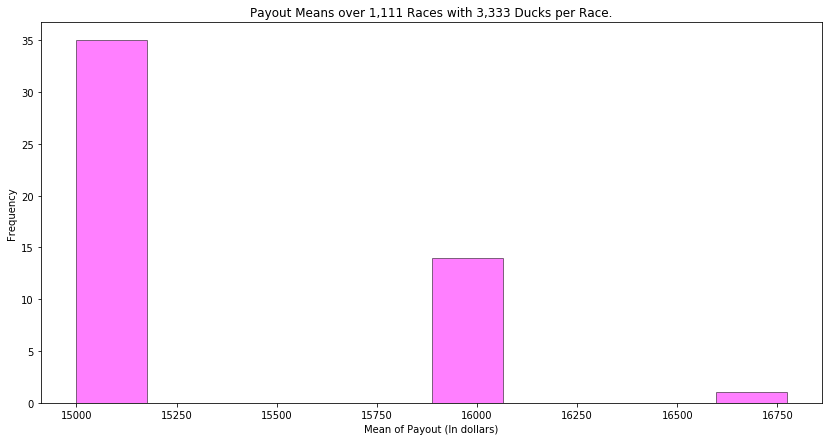

In [4]:
#Graphing the function in part G.
listMeans=[] #List to hold means.
means=[] #List where the final means are appended.
#Iterate 50 times using range.
for x in range(50):
    #List to hold the list of pays that the simulation duck races return.
    listPays=(run_Simulation_Duck_Race(1111, 3333))
    #Store the mean of each pay into a list of means.
    listMeans=np.mean(listPays)
    #Now append all those means to a new list.
    means.append(listMeans)
#Plot the mean list.
fig, ax = plt.subplots(figsize=(14,7))
ax.set_title("Payout Means over 1,111 Races with 3,333 Ducks per Race.") #title 
ax.set_xlabel("Mean of Payout (In dollars)") #x axis label
ax.set_ylabel("Frequency") #y axis label
plt.hist(means, color="magenta", edgecolor="black", alpha=0.5) #plot the histogram

**PART H (Solution):**

The graph above shows us the mean values of payouts that we get from simulating 1,111 games. The reason we are getting distinct values is because there are times our duck will be the special duck and win 1,000,000 which will bring the total mean of the function up. Now, given our duck is more likely to just be a regular duck and win, than be a special duck and win, it makes sense that the payout over 1,111 games simulated 50 times gives us a higher frequence around 15,000. 16,000 and 16,750 are way smaller, because that means that there is some games in our simulation where our lucky duck is actually winning as a special. 

**Part I:** Pick a lucky number in between 1 and 7000 and run your function from part F 25000 times with 7,000 ducks. Capture all the results and find the number of times your duck won! Was your duck ever a winner or even a special Million Dollar Winner?

In [5]:
#Don't change this api. Use the parameters passed in in your implemenation of this function.
#I am going to declare a variable called lucky duck which I will pass into my function. My lucky duck number is going to be 4444.
lucky_Duck = 4444
#Now I will write my function below.
def run_Simulation_Duck_Race(num_Duck_Races, num_Ducks_Per_Race):
    numDuck=0 #A variable to keep charge of the number of duck. This will be used to see if the winning duck number is the same as my lucky duck number.
    typeWinner=0 #This variable will keep track of the type of winner. Regular, or Special?
    for i in range(num_Duck_Races):
        #Our variables are the output (tuple) from the rubber ducky race in the earlier parts.
        numDuck, typeWinner = rubber_Ducky_Race(num_Ducks_Per_Race) 
        #From the function above, we now have the duck number that won, and the type of winner it was. Now we can perform analysis on it and see if it was our duck!
        if (typeWinner == Types_Of_Winner.SPECIAL and numDuck==lucky_Duck):
            #If the type of the winner was special and the number was the same as mine...
            print("Lucky Duck was Special Duck and won $1,000,000!") #Then I won 1,000,000!
        elif (typeWinner == Types_Of_Winner.REGULAR and numDuck==lucky_Duck):
            #Otherwise if the winner was a regular duck and the number was the same as mine...
            print("Lucky Duck was Regular Duck and won $15,000") #Then I won 15,000.
#Now I will run the function 25,000 times with 7,000 ducks.
print("Here is the Simulation")
run_Simulation_Duck_Race(25000, 7000)

Here is the Simulation
Lucky Duck was Regular Duck and won $15,000
Lucky Duck was Regular Duck and won $15,000
Lucky Duck was Regular Duck and won $15,000
Lucky Duck was Regular Duck and won $15,000
Lucky Duck was Regular Duck and won $15,000


**PART I (Explanation):**

The code has comments in for more details, but basically after getting the duck number and the type of winner from the rubber ducky race function that we wrote earlier, I compared it to my lucky duck number and then print out if my duck is ever the winner depending on the results. I run the function 25,000 times with 7,000 ducks each time, so being special is very very rare! I haven't gotten the special prize yet, but I've won regular a few times!

<br>

---
[Back to top](#top)
<a id='p2'></a>

### [20 points] Problem 2: Tax Fraud

Let $X =$ the leading digit of a randomly selected number from a large accounting ledger. So, for example, if we randomly draw the number $\$20,695$, then $X = 2$. People who make up numbers to commit accounting fraud tend to give $X$ a (discrete) uniform distribution, i.e., $P(X = x) = 1/9$, for $x \in \{1,...,9\}$. However, there is empirical evidence that suggests that "naturally occurring" numbers (e.g., numbers in a non-fraudulent accounting ledger) have leading digits that do not follow a uniform distribution. Instead, they follow a distribution defined by:

\begin{align*}
f(x) = \log_{10}\bigg(\frac{x+1}{x}\bigg), \,\,\,\, x = 1,2,...,9.
\end{align*} 

Using ${\tt tax.txt}$, a dataset containing the taxable incomes for individuals in 1978, we will decide whether this dataset is fraudulent. 



**Part A**:  Read in the data and create a variable that holds only the first character of each data point.

In [33]:
#Let's first start this problem by reading in the file and opening it. In Python we can use open function,
#and give it the 'r' for read.
fileRead=open('tax.txt','r')
#Now we make a list to hold the chars of the second column in our list.
list_Chars=[]
#Now we read in the file, line by line.
fileRead.readline()
#We skip the first line of the file because it's just the header of the document.
linesRead = fileRead.readlines()
#Now using a for loop we iterate through each line.
for i in linesRead: 
    #First we want to replace and remove all the end of the line characters with the empty. So we 
    #add the replace function, give it the \n argument to be replaced with nothing.
    i=i.replace('\n',"")
    #Now we want to split at the tab character, because in the actual tax documents, the tab is included
    #betwen the columns and values.
    splitValue=i.split('\t')
    #We then specify what characters we want to keep and what characters we don't want by using the
    #[1] and the [0].
    secondColChar = splitValue[1][0]
    if int(secondColChar) != 0:
        #Finally, we append it as an INTEGER into our list we declared above.
        list_Chars.append(int(secondColChar))

**PART A (Explanation):** 

Even though my code has comments about what I did, I basically first read in my file, make a list to hold the character of the data points, read in the lines making sure to skip the first one, and then perform analysis on it through my for loop, where I first replace newline characrers with empty, then proceed to split at the tab, and then specify what character I want to keep, and to get rid of the rest of the number. Lastly, I append it to my list and I'm good to go.

**Part B**: Create a histogram of the data that also plots or overlays the suggested non-fradulent density $f(x)$ as well as the density of the discrete uniform over the same support.

**SOURCES USED:**

1 - (Line Graph Markers) https://stackoverflow.com/questions/8409095/matplotlib-set-markers-for-individual-points-on-a-line

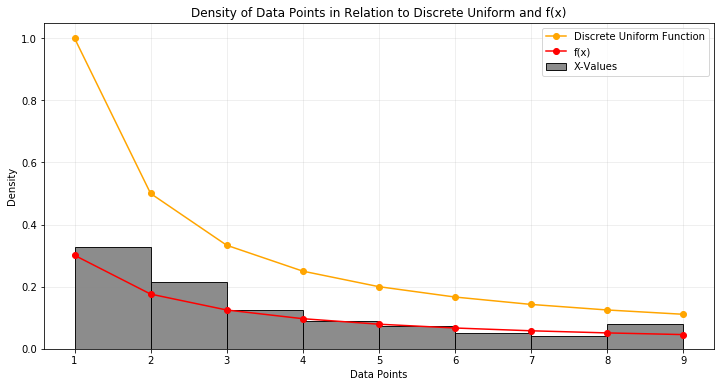

In [34]:
#Alright, the first thing I'm going to do is create a function for a discrete uniform. I'm going to pass in an integer.
def discrete_uniform(num1):
    #I will set some variable called uni, for uniform and set it equal to 1/num, whatever num is.
    uni=(1/num1)
    #Then I'll just return that number. Remember, num should be between 1 and 9, as its listed in the top.
    return uni

#Now it's time to make my f(x) function to simulate the function from above which uses a log base 10 of x+1/x.
#x will again be some integer from 1 to 9.
def func(num2):
    #I imported math here and used a log base 10 which is the second arumgent of the log function as seen below. The first argument is the actual
    #function inside the logarithm. 
    log_val=math.log(((num2 + 1)/num2), 10)
    #After computing that value, just return the log value you got.
    return log_val

#Now I'm going to create 3 different lists.
#I first define a list of integers which is the set of possible values that can be used in discrete uniform and f(x). 
int_list = [1,2,3,4,5,6,7,8,9] #Think of this as the list that entails x in {1, 2, ...9}. It's the domain.
#Now I'm making a list to hold what happens to values 1-9 once they're run through the discrete function above.
discreteVals = []
#Similarly, I declare funcVals to hold what happens to values 1-9 once they're run through f(x).
funcVals = []

#Now that I have my lists declared, I am going to pass the values from my integer list declared above into the discrete function and f(x).
for val in int_list:
    discreteVals.append(discrete_uniform(val)) #Passing 1-9 into discrete uniform function and appending those to a list.
    funcVals.append(func(val)) #Passing 1-9 into f(x) and appending those to a list.

#Now I'm going to convery the lists into numpy arrays.
DiscreteUniformArr = np.array(discreteVals) #Numpy array for discrete uniform values.
FuncArr = np.array(funcVals) #Numpy array for f(x) values.

#Time to plot!
fig, ax = plt.subplots(figsize=(12,6))
#Gonna set bin range from 1 to 10 because we are using numbers 1 through 9 so it makes most sense.
my_bins=range(1,10)
#My first plot is a histogram of the density of the list of values from part a that we stored into the variable list_Chars. (Refer to part A).
plt.hist(list_Chars, density=True, bins = my_bins, facecolor="gray", edgecolor="black", alpha=0.9, label="X-Values")
#Now I plot my Discrete Uniform values across 1-9 in the color Orange. I pass in int list as the first arg so it knows it's going from 1 to 9.
plt.plot(int_list, DiscreteUniformArr, color="orange", marker="o", label="Discrete Uniform Function")
#Then I plot my Function f(x) values across 1-9 in the color Red. I pass in int list as the first arg again.
plt.plot(int_list, FuncArr, color="red", marker="o",label="f(x)")
#Now some of the more "visual" parts of my graph.
ax.grid(alpha=0.25) #transparency of grid lines.
ax.set_axisbelow(True) #set grid lines below plots.
ax.set_ylabel("Density") #Setting y-axis label
ax.set_xlabel("Data Points") #Setting x-axis label.
ax.set_title("Density of Data Points in Relation to Discrete Uniform and f(x)") #Setting title for overall plot.
#I create a legend to make it clear what is referring to what.
ax.legend();

**PART B (Explanation):**

I drew a line plot instead of a histogram because histogram overlays were giving me a LOT of trouble with this particular question. But it still showcases the exact same thing that the question asked. In dark grey is my list from part A, the one where I had to strip out everything but the first integer of the data point. Overlayed in red is the non-fraudulent density function f(x) used on integers 1 through 9. Finally, in Yellow is the Discrete Uniform distribution. $\underline{\text{Please see my code for detailed commentary about each step}}$, but in summary I graphed all 3 functions and overlayed f(x) and discrete uniform function on my density histogram of values from part A. I created the functions in the code, ran values 1-9 through them, and then converted those to numpy arrays which I then charted.

**Part C**: Does it appear as those the data is fraudulent, not fraudulent, or too hard to tell?  What kind of numerical measures could you use to support such a conclusion?

**PART C (Solution):**

It appears to me, that the data is not fraudulent because the trend that it follows is very much like the values that come out of our f(x) function. In the first part of the problem it says, "there is empirical evidence that suggests that "naturally occurring" numbers (e.g., numbers in a non-fraudulent accounting ledger) have leading digits that do not follow a uniform distribution. Instead, they follow a distribution defined by..." and then proceed to show the f(x) function with uses a log base 10. If you look at my graph above, the densities of the first character of each data point align very closely with the f(x) function, whereas the discrete uniform trend is higher up. Because our data is closer to f(x), we can assume it's very unlikely to be fraudulent. Numerical measures we can use to support that conclusion is also using something like a Tukey 5 number summary, where we can calculate means, quartiles and outliers to see if we get a similar spread of data across fraudulent data, and non fraudulent data by using our discrete uniform and f(x) functions.

**Part D**: Create a new object that stores only the first digit of the first 100 distinct powers of 2, e.g. $Y=[2, 2^2, 2^3, 2^4, \dots ]$.  Repeat steps a) and b) for this new data set, plotting the distribution of the first digit of terms in $Y$ against $f(x)$.

**SOURCES USED**

1 - (Reminder on Operators) https://stackoverflow.com/questions/15193927/what-do-these-operators-mean

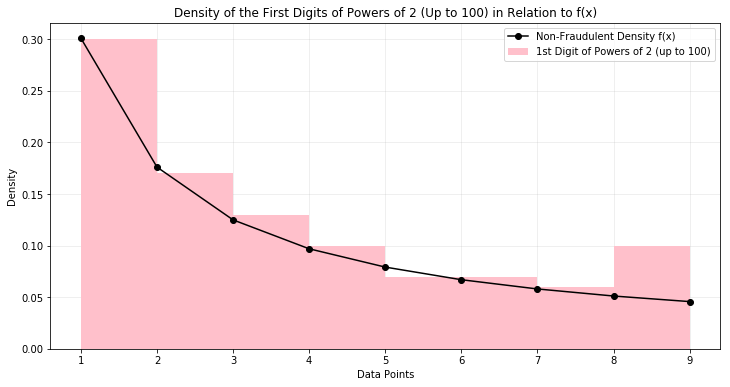

In [35]:
#First I will declare a list called powers to hold all the powers of 2 up to 100.
powers=[]
#I'll then iterate 100 times and append each power of 2 up until 100 into my list.
for i in range(100):
    powers.append(2**i) #take 2^i and append it.
#Now I have declared a list to hold the first digit of each of those powers.
firstDigitPowers=[]
#Iterate over each element in powers, and strip the rest of the number off, just keep the first number.
for element in powers: 
    #I learned about this really unique way of stripping the first digit of every element in a list a while ago, and decided to use this technique.
    #The "//" in Python is to divide with the integral result, and then to discard the remainder.
    firstNumber = (element//10**int(math.log(element, 10))) #Take a log base 10.
    #After using that "split" variation, now append the first number to the list.
    firstDigitPowers.append(firstNumber)
#I then graphed my results!
fig, ax = plt.subplots(figsize=(12,6))
my_bins=range(1,10)
plt.hist(firstDigitPowers, density=True, bins = my_bins, facecolor="pink", label="1st Digit of Powers of 2 (up to 100)")
plt.plot(int_list, FuncArr, color="black", marker="o", label="Non-Fraudulent Density f(x)")
ax.grid(alpha=0.25) #transparency of grid lines.
ax.set_axisbelow(True) #set grid lines below plots.
ax.set_ylabel("Density") #Setting y-axis label
ax.set_xlabel("Data Points") #Setting x-axis label.
ax.set_title("Density of the First Digits of Powers of 2 (Up to 100) in Relation to f(x)") #Setting title for overall plot.
#I create a legend to make it clear what is referring to what.
ax.legend();

**PART D (Explanation):**

Refer to Code for step by step instruction. I took the powers of 2 up to 100, stored that in a list. Then ran that list through a for loop and performed a "split" operation to keep the first digit only by using a log and math function I learned about a while ago instead of making an actual Python Split. After that, I graphed the density of that list in comparison to the f(x) from that I graphed above! The overlay is quite interesting, and I see a heavy correlation, as the trend of the both is very similar.

<br>

---
[Back to top](#top)
<a id='p3'></a>

### [30 points] Problem 3: Poker

It's time to play poker.  (https://en.wikipedia.org/wiki/Texas_hold_%27em#Hand_values) Assume that we are using a standard deck of cards without jokers (52 cards). For each round, you will be dealt 5 cards from the deck without replacement. There are several different types of hands that can be dealt; listed below are a few of interest: 

- Highcard (Simple value of the card. Lowest: 2 - Highest: Ace)
- Pair (Two cards with the same value)
- Two pair (Twice two cards with the same value)
- Three of a kind (Three cards with the same value)
- Straight (Sequence of 5 cards in increasing value, Ace can only follow K)
- Four of a kind (Four cards with the same value)
- Full house (Three of a kind and a pair)
- Flush (5 cards of the same suit)

**Part A**: What is the exact probability you get at least a Pair in your 5 cards? What is the probability of getting a Full House?  (Note that we're including pairs as a subset of a full house, here)

**Part A (Solution):**

We can approach the problem in a lens where we look at it like the probability of having at least one pair is the probability of having no pairs, subtracted from 1. If we have no pairs at all, then we need to choose from 5 unique ranks. (Where ranks are the values from Ace to King). 

We can write choosing a rank as the following. ${13 \choose 5}$ because this is the number of ways to choose 5 different ranks. 

Now for each one of these ranks (or, values) we have to pick from one of the 4 suits (Diamonds, Hearts, Spades, Clovers). Therefore, the number of 5-Card hands that don't have any pair can be written as the following. 
$${13 \choose 5}\cdot4^5$$

We have a 52 card deck, a hand of 5 cards, so we can write the probability of not getting a pair in the following way. 
$$\frac{{13 \choose 5}\cdot 4^5}{{52 \choose 5}} \approx 0.51$$

So now we know the probability of having at least one pair is what we just wrote above subtracted off from 1. Like so.
$$1 - (\frac{{13 \choose 5}\cdot 4^5}{{52 \choose 5}})$$

The probability therefore, of having at $\textbf{LEAST a pair}$ is...
$$1 - 0.51  \approx 0.49 \checkmark$$

Now we can look at the probability of a Full House. Because a Full House is having 3 cards that are of the same kind, we can write it like this.

$${13 \choose 1} \cdot {4 \choose 3} \cdot {12 \choose 1} \cdot {4 \choose 2}$$

First you have to pick a rank of the card which gives us 13 choices, and in that, you must pick 3 out of 4 of them to have a Full House. Then we need to pick a second rank of card and choose 2 from that out of 4. That's why we have the different possibilities listed above.

We then know we have 52 cards in our Deck, and a hand of 5 cards, so like with the pair probability, we can make this a fraction.

$$\frac{{13 \choose 1} \cdot {4 \choose 3} \cdot {12 \choose 1} \cdot {4 \choose 2}}{{52 \choose 5}}$$

Now we can solve for this, and see that the probability of having a $\textbf{Full House}$ is...

$$\frac{3744}{2598960} \approx 0.0014 \checkmark$$

**Part B**: Write a function `getCards()` to randomly generate 5 cards from the no-joker deck. This function should return an array of 5 cards.

**SOURCES USED:**

1 - (Concatenation in Python) https://stackoverflow.com/questions/12169839/which-is-the-preferred-way-to-concatenate-a-string-in-python

In [36]:
def getCards():
    #The first thing I will do is define all my lists of the suits and of the numbers as seperate lists.
    valsArray = ["ACE", "JACK", "QUEEN", "KING", "2", "3", "4", "5", "6", "7", "8", "9", "10"] #List of the possible values that you can get a suit of.
    suitsArray=["Diamonds","Spades","Hearts","Clovers"] #List of the possible suits you can recieve.
    Deck = [] #Deck of the cards you intend to use.
    #I used a while loop iteration instead of a for loop because I was having quite the struggle trying to get a for i in range(5) to iterate 5 times every time.
    #It gave me a mix and match of lists with 4 and 5 elements, so I stuck with a simple while loop iterator.
    iteration=0
    #Iterate 5 times.
    while(iteration<5):
        #Pick a suit.
        suit = random.choice(suitsArray) #Used random choice to pick from any suit.
        #Pick a corresponding value.
        values = random.choice(valsArray) #Used random choice to pick from any value.
        #Concatenate the suit and values together separated by a space. 
        finalPick = suit + " " + values #Spaces are easily split on later in the problems.
        #Here we check if our final pick is not already in the deck to make sure we avoid repeating values.
        #So if it's not in our deck already...
        if(finalPick not in Deck):
            Deck.append(finalPick) #append it to the deck.
            iteration=iteration+1 #add 1 to the iterator.
    #Finally, return our deck.
    return Deck
#Testing the function.
test=getCards()
#Print the sample array.
print("A sample 5 Cards are...{}".format(test))

A sample 5 Cards are...['Clovers 9', 'Hearts 7', 'Clovers 2', 'Hearts JACK', 'Clovers 8']


**PART B (Explanation):**

Refer to the code for a more detailed explanation, but in essence I first declare two lists... one for suits and one for possible values associated with the suits from Aces to Kings. I then use a while loop to mix and match 5 combos of a suit + value and make a card that way. I then generate 5 cards via that process and print out my deck of 5 cards.

**Part C**: Run the `getCards()` simulation 10000 times, and store the result in an array named `card_array`.

In [37]:
#I will declare an array of cards.
card_array = []
#Iterate over 10,000 times and fill it with cards.
for i in range(10000):
    card_array.append(getCards())
#Now card_array will hold 10,000 sets of 5 cards each.

**Part D**: Write a function `pair(card_array, num_sim)` For the 10000 simulations we did in Part C, what is the probability of have Pair? Does the result agree with your calculation in Part A?

In [38]:
#Now we are going to write a pair function that will calculate the probability of having a pair.
def pair(card_array,num_sim):
    #I am going to declare a num value here to hold the number of pairs.
    numPair=0
    #Now I'm going to iterate over every card in the card array from Part C.
    for card in card_array:
        #Set match to be a value that will change depending on if we have a pair or not. Right now it's set to 0 (False).
        match = 0 #No Pair right now.
        #Now we need to for loops to iterate through each card.
        #Iterate over the length of each of each card in card array.
        for element in range(0 , len(card)-1):
            #Iterate over each element in the card stack now.
            for element2 in range(element+1,len(card)):
                #We then perform a check to see if the card elements are equivalent, then we know we have a pair.
                if(card[element][-1] == card[element2][-1]):
                    #If the two elements match, then set our match variable to 1 to alert us it's true.
                    match = 1
        #Now that we have exited the loop, we see if our match is confirmed. If it's 1, there's a pair.
        if(match == 1):
            numPair = numPair + 1 #Because there is a pair, increment the numPair variable.
    #Finally, take the probability, and return that.
    probabilityPair = (numPair/num_sim)
    return probabilityPair
#Test function to see if it works.
test2=pair(card_array,10000)
#Print the result.
print("The probability of having a pair is...{}".format(test2))
print("Or, approximately {}%".format(test2*100))

The probability of having a pair is...0.4904
Or, approximately 49.04%


**PART D (Explanation):**

In this function, what I did was to step through the card array, and compare the elements between cards to see if we had any pairs in the Deck. What I did was use a variable to keep track of the number of pairs we'd find in the card array, as well as a variable called match to alert us if we had a pair in the deck. What I did was iterate over each card in the lists inside of card array, and compare the 5 cards amongst eachother, see if the match variable switched to 1 (meaning a pair was found), update number of pairs, and then continue to do that for the rest of the deck. I then took the probability of that by dividing the number of pairs found by the total trials performed. I got about 48%! which is very close to my answer from part A.

**Part E:** Write a function `fullhouse(card_array, num_sim)` For the 10000 simulations we did in Part C, what is the probability of having a Full House? Does the result agree with your calculation in Part A?

**SOURCES USED:**

1 - (Sorting Function in Python) https://www.geeksforgeeks.org/sorted-function-python/

In [39]:
def fullhouse(card_array,num_sim):
    #What I will do first is have a num variable to incremement every time I have a Full House.
    num = 0
    #I iterate over each cards list in my card array.
    for cardList in card_array:
        #I declare a list called cards to hold the ranks (values) of the cards chosen.
        cards = []
        #Now I iterate over each card in the card list.
        for i in cardList:
            #First I use split here to split apart the suits and the ranks.
            val = i.split()
            #I then append the ranks or values (in the 1 position of the split) to cards.
            cards.append(val[1]) #Will append the values.
        #I then sort the numbers.
        cards=sorted(cards)
        #Now I do a check to see if I have a full house by comparing if the first two cards
        #and the last 3 cards are the same ones. So check cards 1 and 2 and see if they are
        #equivalent, and then check cards 3, 4, and 5 and see if they are equivalent.
        if(cards[0]==cards[1] and cards[2]==cards[3]==cards[4]):
            #If they are, then we have a full house, so increment the num variable.
            num = num + 1
        #Now I do a check to see if I have a full house by comparing if the first three cards
        #and the last 2 cards are the same ones. So check cards 1, 2, and 3 and see if they 
        #are equal, and then check cards 4, and 5, and see if they are equal.
        elif(cards[0]==cards[1]==cards[2] and cards[3]==cards[4]):
            #If they are, then we again have a full house, so increment num.
            num = num + 1
    #Now to find the probability what we do is take the number of Full Houses found, and
    #divide that by the number of times we ran the simulation, and that should give us our probability.
    answer = (num / num_sim)
    #return the answer.
    return answer
#Test function to see if it works.
m = fullhouse(card_array,10000)
#Print result.
print("The probability of having a Full House is...{}".format(m))
print("Or, approximately {}%".format(m*100))

The probability of having a Full House is...0.0015
Or, approximately 0.15%


**PART E (Explanation):**

In this function, what I did was iterate through cards array, looking at every single value of the cards lists inside of it. So what I'd do is split out the rank, and compare the ranks of the cards amongst eachother for every single 5 hand card list present in the array. I'd first see if the first 2 cards were the same and last 3 cards were the same, implying a full house, then I'd see if the first 3 cards were the same, and the last 2 cards were the same, also implying another full house. Each time I found a full house, I'd increment my num variable. Then I'd move onto the next hand of cards and do the same for that, until I reached the end of the cards array. After that I computed the probability and output it! I ended up getting $\approx 0.001$ every time, which is close to my answer from Part A.